In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import pickle

In [32]:
def analyze_cache_data_to_df(cache_data):
    rows = []
    for cache_type, configurations in cache_data.items():
        for config, stats in configurations.items():
            TLB_miss = stats['TLB_access'] - stats['TLB_hit']
            L1_miss = stats['L1_access'] - stats['L1_hit']
            L2_miss = stats['L2_access'] - stats['L2_hit']
            average_cycles = stats['Average_Cycles']

            row = {
                'Cache Type': cache_type,
                'Line Size': config[0],
                'L1 Cache Size': config[1] // 1024,
                'L2 Cache Size': config[2] // 1024,
                'tlb_sizes': config[3],
                'TLB_hits': stats['TLB_hit'],
                'TLB_misses': TLB_miss,
                'L1_hits': stats['L1_hit'],
                'L1_misses': L1_miss,
                'L2_hits': stats['L2_hit'],
                'L2_misses': L2_miss,
                'Average_Cycles': average_cycles
            }
            rows.append(row)
    return pd.DataFrame(rows)


s1 = pickle.load(open("case1.pickle", 'rb'))

# Convert to DataFrame
df = analyze_cache_data_to_df(s1)
print(df['Cache Type'] == 'Split')

0      True
1      True
2      True
3      True
4      True
      ...  
67    False
68    False
69    False
70    False
71    False
Name: Cache Type, Length: 72, dtype: bool


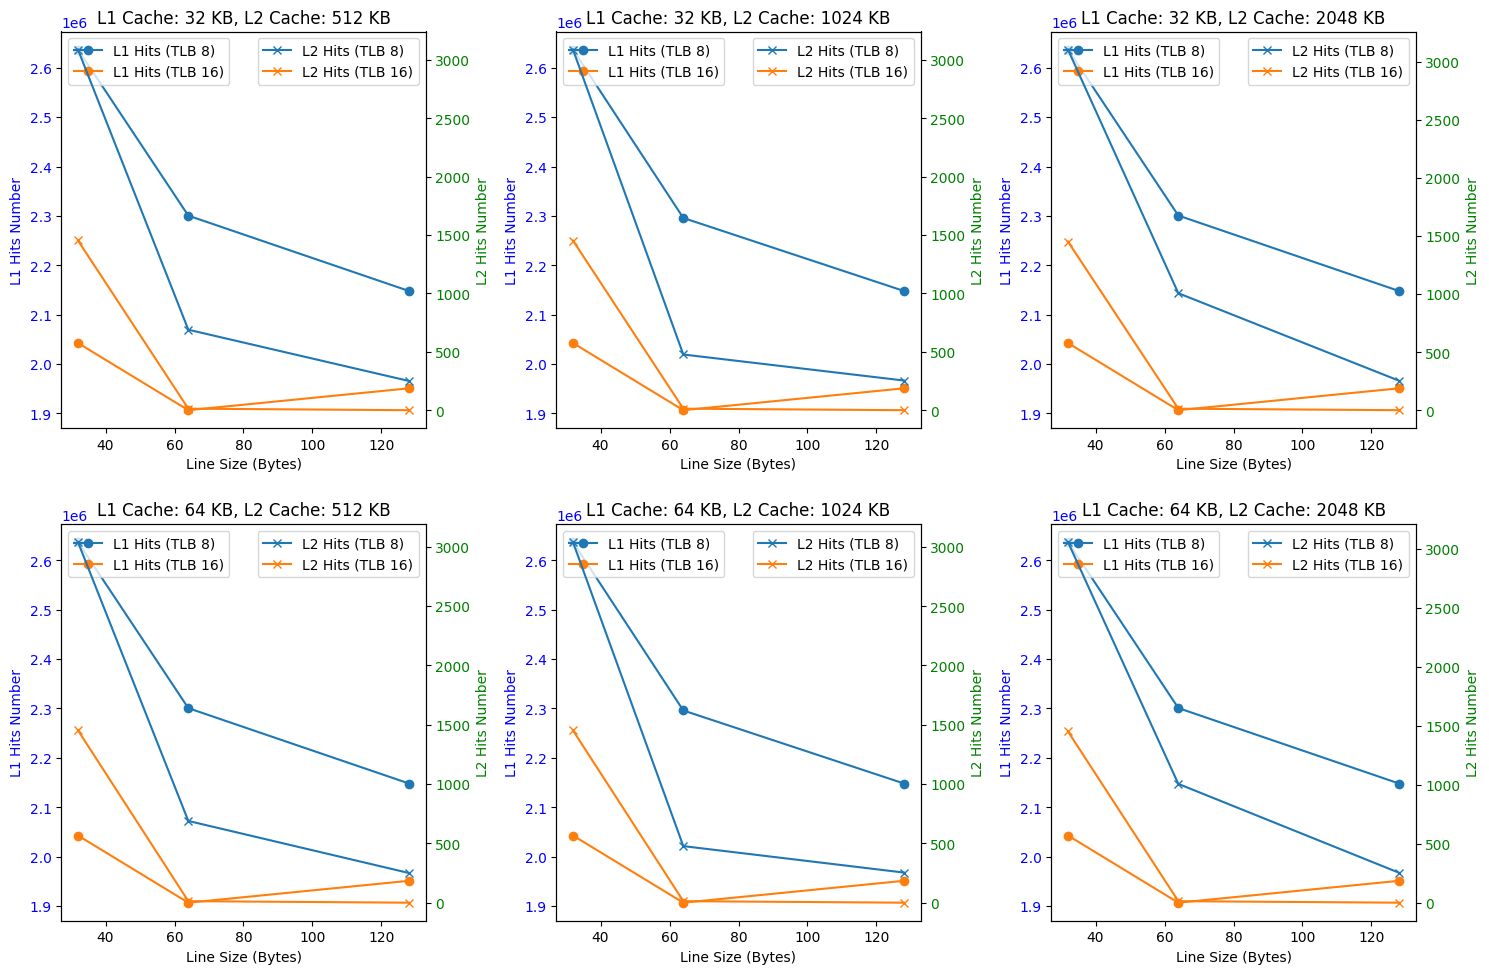

In [37]:
l2_cache_sizes = [512, 1024, 2048]
l1_cache_sizes = [32, 64]
tlb_sizes = [8, 16]

# Create a subplot for each combination of L1 and L2 cache sizes
fig, axs = plt.subplots(len(l1_cache_sizes), len(l2_cache_sizes), figsize=(15, 10), squeeze=False)

for i, l1_cache_size in enumerate(l1_cache_sizes):
    for j, l2_cache_size in enumerate(l2_cache_sizes):
        ax = axs[i, j]
        ax2 = ax.twinx()  # Create a twin y-axis for L2 Hits

        for k, tlb_size in enumerate(tlb_sizes):
            # Filter data for specific L1, L2, and TLB sizes
            df_filtered = df[(df['L1 Cache Size'] == l1_cache_size) & 
                             (df['L2 Cache Size'] == l2_cache_size) & 
                             (df['tlb_sizes'] == tlb_size) &(df['Cache Type'] == 'Split')] 
            # Plotting L1 Hits on the original y-axis
            ax.plot(df_filtered['Line Size'], df_filtered['L1_hits'], 
                    marker='o', linestyle='-', label=f'L1 Hits (TLB {tlb_size})')

            # Plotting L2 Hits on the secondary y-axis
            ax2.plot(df_filtered['Line Size'], df_filtered['L2_hits'], 
                     marker='x', linestyle='-', label=f'L2 Hits (TLB {tlb_size})')

        ax.set_ylabel('L1 Hits Number', color='blue')
        ax2.set_ylabel('L2 Hits Number', color='green')
        ax.set_title(f'L1 Cache: {l1_cache_size} KB, L2 Cache: {l2_cache_size} KB')
        ax.set_xlabel('Line Size (Bytes)')
        ax.tick_params(axis='y', labelcolor='blue')
        ax2.tick_params(axis='y', labelcolor='green')

        ax.legend(loc='upper left')
        ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


From the figure above, we can see split L1 cache.  We can find that when line size increase, the L1 hit number decrease. Because the line size increase, the number of lines decrease, so the L1 hit number decrease.

L1 miss number is total number - L1 hit number, so we don't plot L1 miss number in figures.

We can find TLB entries incerase, L1 hit decrease,  this is because L1 hit often doing page table walk, so TLB entries increase, page walk decrease, so L1 hit decrease.


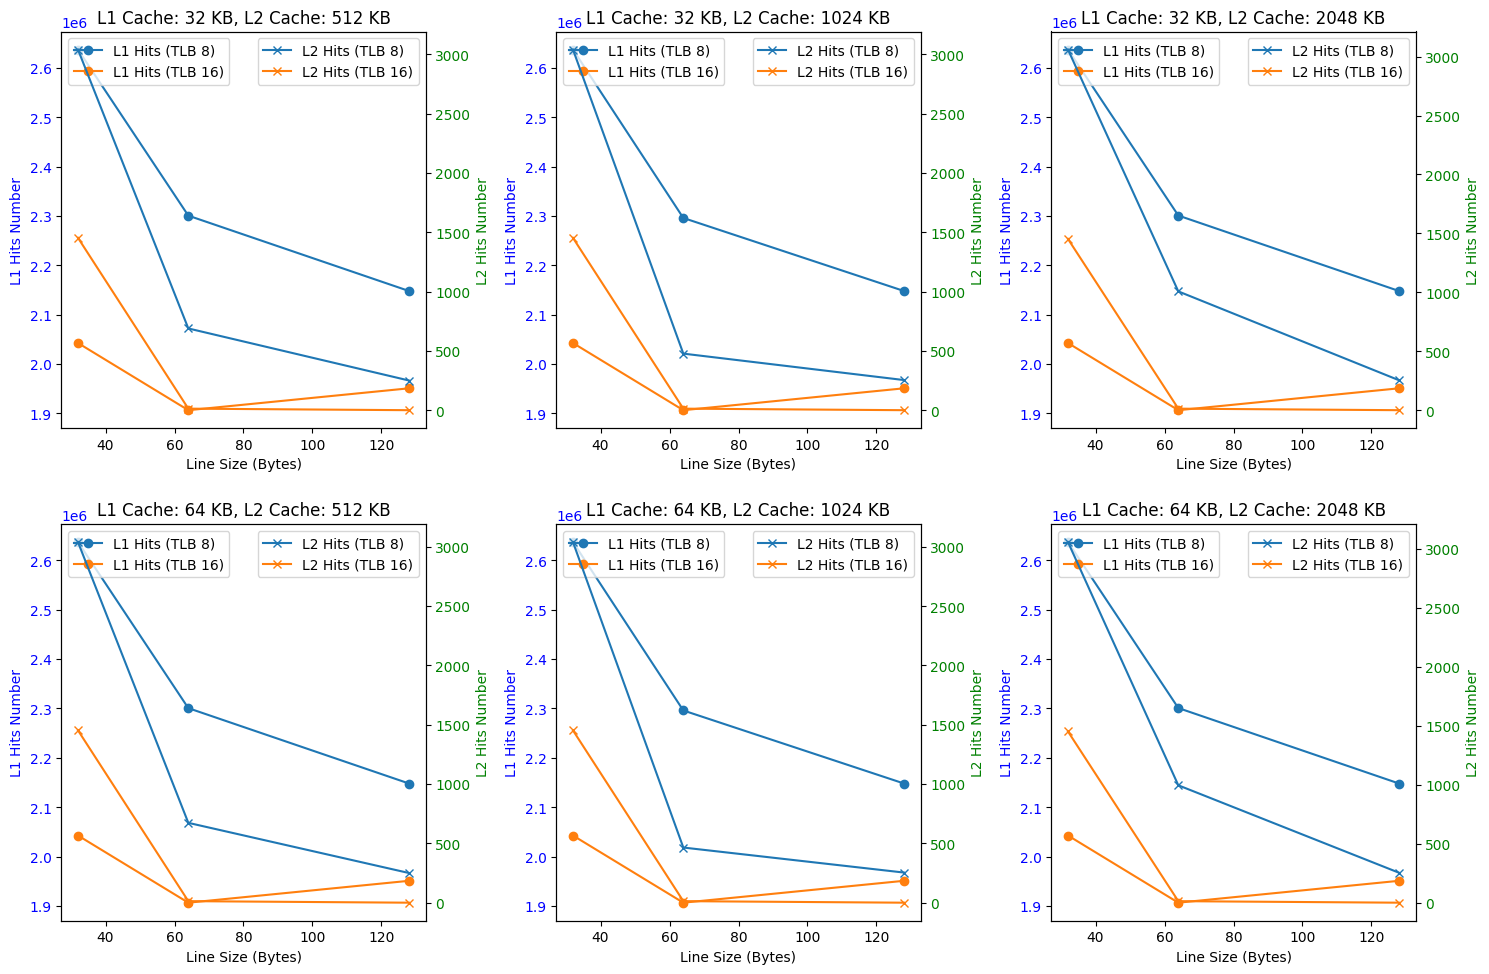

In [38]:
l2_cache_sizes = [512, 1024, 2048]
l1_cache_sizes = [32, 64]
tlb_sizes = [8, 16]

# Create a subplot for each combination of L1 and L2 cache sizes
fig, axs = plt.subplots(len(l1_cache_sizes), len(l2_cache_sizes), figsize=(15, 10), squeeze=False)

for i, l1_cache_size in enumerate(l1_cache_sizes):
    for j, l2_cache_size in enumerate(l2_cache_sizes):
        ax = axs[i, j]
        ax2 = ax.twinx()  # Create a twin y-axis for L2 Hits

        for k, tlb_size in enumerate(tlb_sizes):
            # Filter data for specific L1, L2, and TLB sizes
            df_filtered = df[(df['L1 Cache Size'] == l1_cache_size) & 
                             (df['L2 Cache Size'] == l2_cache_size) & 
                             (df['tlb_sizes'] == tlb_size) &(df['Cache Type'] == 'Unified')] 

            # Plotting L1 Hits on the original y-axis
            ax.plot(df_filtered['Line Size'], df_filtered['L1_hits'], 
                    marker='o', linestyle='-', label=f'L1 Hits (TLB {tlb_size})')

            # Plotting L2 Hits on the secondary y-axis
            ax2.plot(df_filtered['Line Size'], df_filtered['L2_hits'], 
                     marker='x', linestyle='-', label=f'L2 Hits (TLB {tlb_size})')

        ax.set_ylabel('L1 Hits Number', color='blue')
        ax2.set_ylabel('L2 Hits Number', color='green')
        ax.set_title(f'L1 Cache: {l1_cache_size} KB, L2 Cache: {l2_cache_size} KB')
        ax.set_xlabel('Line Size (Bytes)')
        ax.tick_params(axis='y', labelcolor='blue')
        ax2.tick_params(axis='y', labelcolor='green')

        ax.legend(loc='upper left')
        ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

From the figure above, we can see unified L1 cache.  We can find that when line size increase, the L1 hit number decrease. Because the line size increase, the number of lines decrease, so the L1 hit number decrease.

L1 miss number is total number - L1 hit number, so we don't plot L1 miss number in figures.

We can find TLB entries incerase, L1 hit decrease.

# Case2

In [42]:
def analyze_cache_data_to_df(cache_data):
    rows = []
    for cache_type, configurations in cache_data.items():
        for config, stats in configurations.items():
            TLB_miss = stats['TLB_access'] - stats['TLB_hit']
            L1_miss = stats['L1_access'] - stats['L1_hit']
            L2_miss = stats['L2_access'] - stats['L2_hit']
            average_cycles = stats['Average_Cycles']

            row = {
                'Cache Algo': cache_type,
                'Line Size': config[0],
                'L1 Cache Size': config[1] // 1024,
                'L2 Cache Size': config[2] // 1024,
                'tlb_sizes': config[3],
                'TLB_hits': stats['TLB_hit'],
                'TLB_misses': TLB_miss,
                'L1_hits': stats['L1_hit'],
                'L1_misses': L1_miss,
                'L2_hits': stats['L2_hit'],
                'L2_misses': L2_miss,
                'Average_Cycles': average_cycles
            }
            rows.append(row)
    return pd.DataFrame(rows)


s2 = pickle.load(open("case2.pickle", 'rb'))
df = analyze_cache_data_to_df(s2)
print(df)

    Cache Algo  Line Size  L1 Cache Size  L2 Cache Size  tlb_sizes  TLB_hits  \
0         FIFO         32             32            512          8    994614   
1         FIFO         32             32            512         16    999832   
2         FIFO         32             32           1024          8    994614   
3         FIFO         32             32           1024         16    999832   
4         FIFO         32             32           2048          8    994614   
..         ...        ...            ...            ...        ...       ...   
103     Random        128             64            512         16    999832   
104     Random        128             64           1024          8    994614   
105     Random        128             64           1024         16    999832   
106     Random        128             64           2048          8    994614   
107     Random        128             64           2048         16    999832   

     TLB_misses  L1_hits  L1_misses  L2

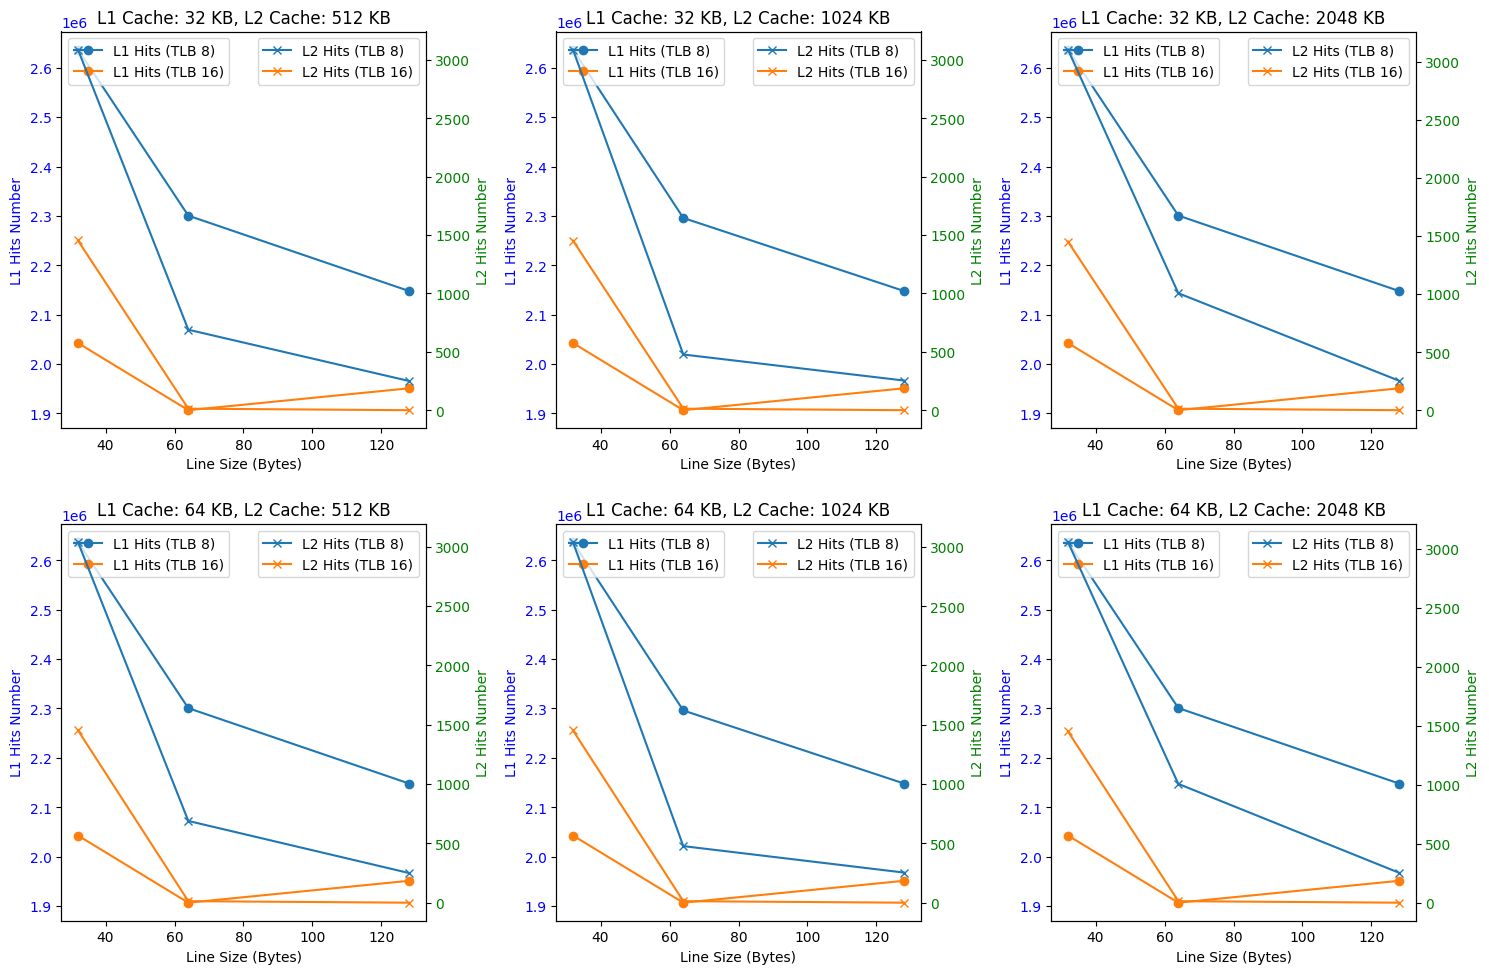

In [43]:
l2_cache_sizes = [512, 1024, 2048]
l1_cache_sizes = [32, 64]
tlb_sizes = [8, 16]

# Create a subplot for each combination of L1 and L2 cache sizes
fig, axs = plt.subplots(len(l1_cache_sizes), len(l2_cache_sizes), figsize=(15, 10), squeeze=False)

for i, l1_cache_size in enumerate(l1_cache_sizes):
    for j, l2_cache_size in enumerate(l2_cache_sizes):
        ax = axs[i, j]
        ax2 = ax.twinx()  # Create a twin y-axis for L2 Hits

        for k, tlb_size in enumerate(tlb_sizes):
            # Filter data for specific L1, L2, and TLB sizes
            df_filtered = df[(df['L1 Cache Size'] == l1_cache_size) & 
                             (df['L2 Cache Size'] == l2_cache_size) & 
                             (df['tlb_sizes'] == tlb_size) &(df['Cache Algo'] == 'FIFO')] 
            # Plotting L1 Hits on the original y-axis
            ax.plot(df_filtered['Line Size'], df_filtered['L1_hits'], 
                    marker='o', linestyle='-', label=f'L1 Hits (TLB {tlb_size})')

            # Plotting L2 Hits on the secondary y-axis
            ax2.plot(df_filtered['Line Size'], df_filtered['L2_hits'], 
                     marker='x', linestyle='-', label=f'L2 Hits (TLB {tlb_size})')

        ax.set_ylabel('L1 Hits Number', color='blue')
        ax2.set_ylabel('L2 Hits Number', color='green')
        ax.set_title(f'L1 Cache: {l1_cache_size} KB, L2 Cache: {l2_cache_size} KB')
        ax.set_xlabel('Line Size (Bytes)')
        ax.tick_params(axis='y', labelcolor='blue')
        ax2.tick_params(axis='y', labelcolor='green')

        ax.legend(loc='upper left')
        ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

From the figure above, we can see FIFO algorithm L1 cache.  We can find that when line size increase, the L1 hit number decrease. Because the line size increase, the number of lines decrease, so the L1 hit number decrease.

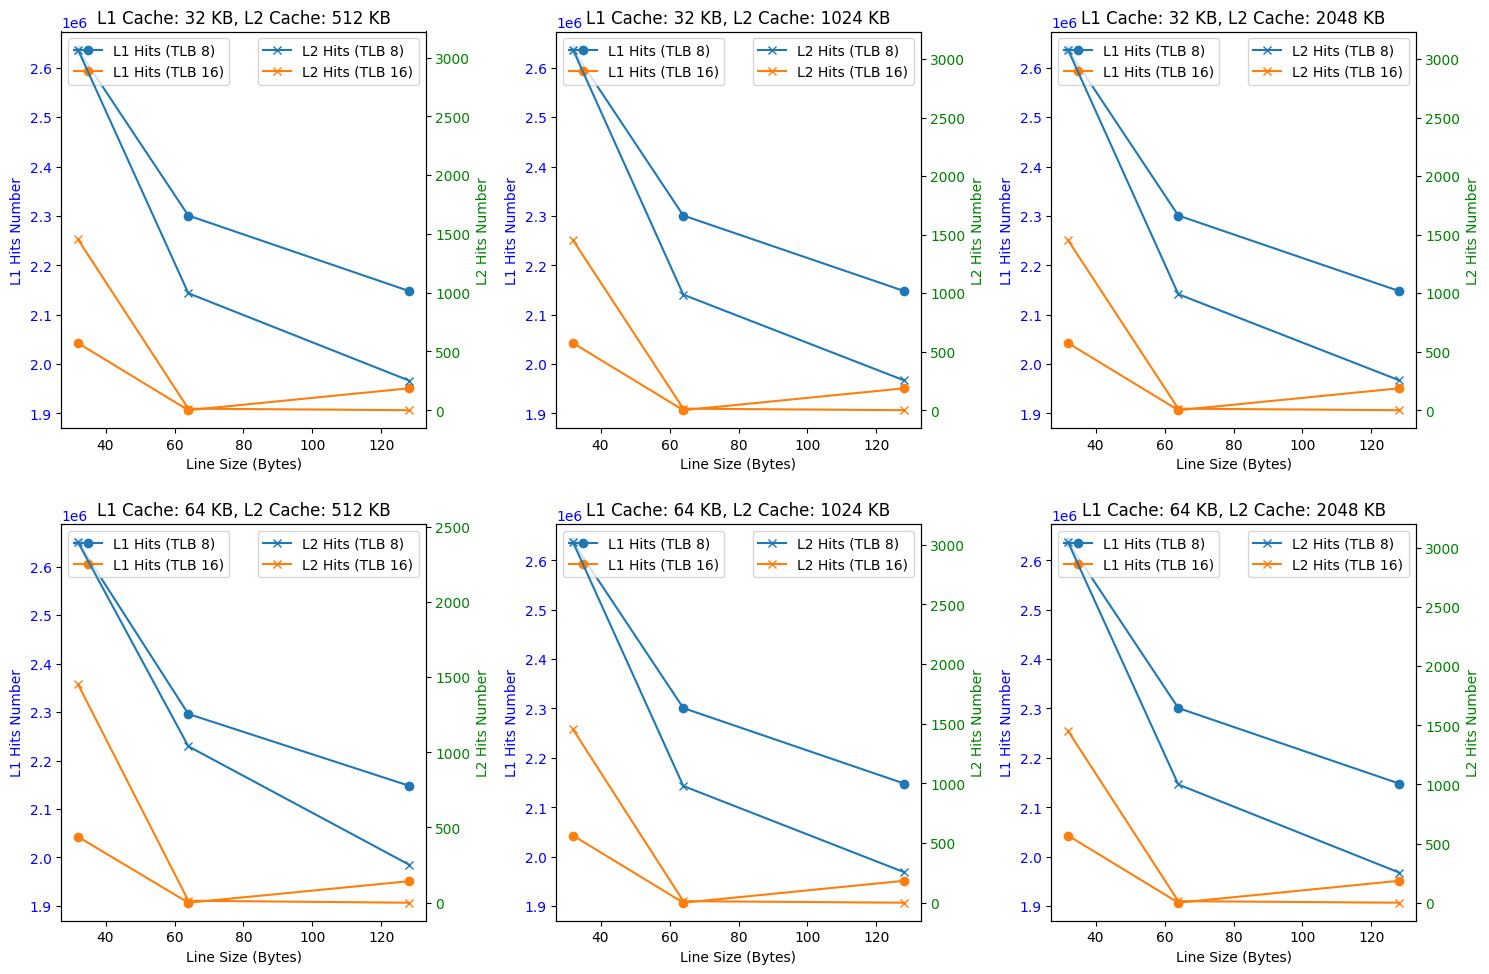

In [44]:
l2_cache_sizes = [512, 1024, 2048]
l1_cache_sizes = [32, 64]
tlb_sizes = [8, 16]

# Create a subplot for each combination of L1 and L2 cache sizes
fig, axs = plt.subplots(len(l1_cache_sizes), len(l2_cache_sizes), figsize=(15, 10), squeeze=False)

for i, l1_cache_size in enumerate(l1_cache_sizes):
    for j, l2_cache_size in enumerate(l2_cache_sizes):
        ax = axs[i, j]
        ax2 = ax.twinx()  # Create a twin y-axis for L2 Hits

        for k, tlb_size in enumerate(tlb_sizes):
            # Filter data for specific L1, L2, and TLB sizes
            df_filtered = df[(df['L1 Cache Size'] == l1_cache_size) & 
                             (df['L2 Cache Size'] == l2_cache_size) & 
                             (df['tlb_sizes'] == tlb_size) &(df['Cache Algo'] == 'Random')] 
            # Plotting L1 Hits on the original y-axis
            ax.plot(df_filtered['Line Size'], df_filtered['L1_hits'], 
                    marker='o', linestyle='-', label=f'L1 Hits (TLB {tlb_size})')

            # Plotting L2 Hits on the secondary y-axis
            ax2.plot(df_filtered['Line Size'], df_filtered['L2_hits'], 
                     marker='x', linestyle='-', label=f'L2 Hits (TLB {tlb_size})')

        ax.set_ylabel('L1 Hits Number', color='blue')
        ax2.set_ylabel('L2 Hits Number', color='green')
        ax.set_title(f'L1 Cache: {l1_cache_size} KB, L2 Cache: {l2_cache_size} KB')
        ax.set_xlabel('Line Size (Bytes)')
        ax.tick_params(axis='y', labelcolor='blue')
        ax2.tick_params(axis='y', labelcolor='green')

        ax.legend(loc='upper left')
        ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

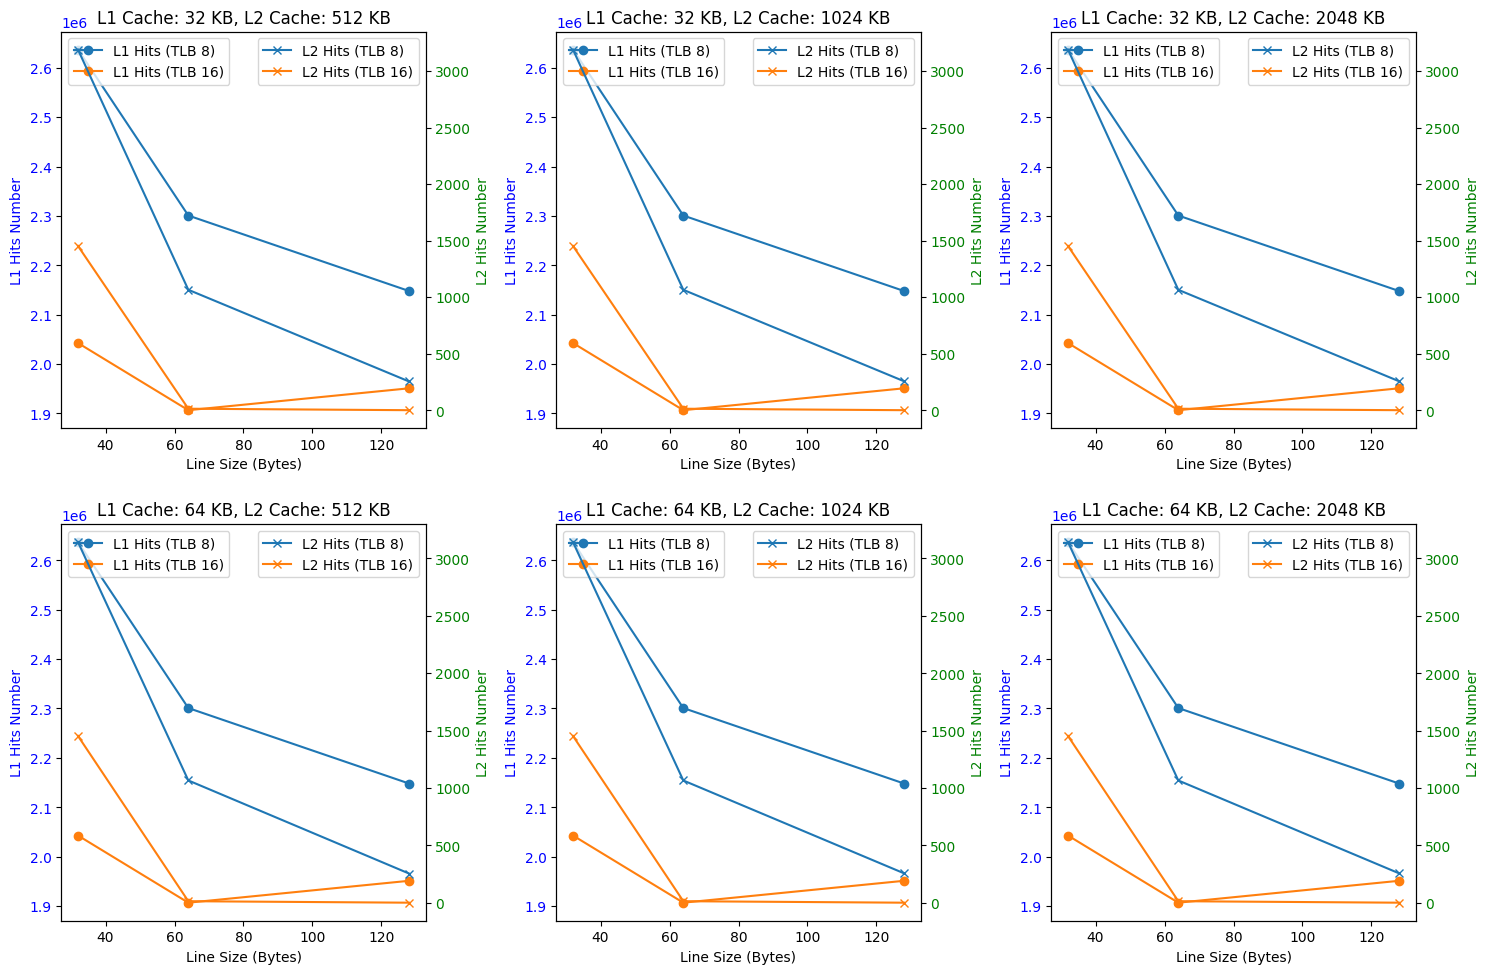

In [45]:
l2_cache_sizes = [512, 1024, 2048]
l1_cache_sizes = [32, 64]
tlb_sizes = [8, 16]

# Create a subplot for each combination of L1 and L2 cache sizes
fig, axs = plt.subplots(len(l1_cache_sizes), len(l2_cache_sizes), figsize=(15, 10), squeeze=False)

for i, l1_cache_size in enumerate(l1_cache_sizes):
    for j, l2_cache_size in enumerate(l2_cache_sizes):
        ax = axs[i, j]
        ax2 = ax.twinx()  # Create a twin y-axis for L2 Hits

        for k, tlb_size in enumerate(tlb_sizes):
            # Filter data for specific L1, L2, and TLB sizes
            df_filtered = df[(df['L1 Cache Size'] == l1_cache_size) & 
                             (df['L2 Cache Size'] == l2_cache_size) & 
                             (df['tlb_sizes'] == tlb_size) &(df['Cache Algo'] == 'LRU')] 
            # Plotting L1 Hits on the original y-axis
            ax.plot(df_filtered['Line Size'], df_filtered['L1_hits'], 
                    marker='o', linestyle='-', label=f'L1 Hits (TLB {tlb_size})')

            # Plotting L2 Hits on the secondary y-axis
            ax2.plot(df_filtered['Line Size'], df_filtered['L2_hits'], 
                     marker='x', linestyle='-', label=f'L2 Hits (TLB {tlb_size})')

        ax.set_ylabel('L1 Hits Number', color='blue')
        ax2.set_ylabel('L2 Hits Number', color='green')
        ax.set_title(f'L1 Cache: {l1_cache_size} KB, L2 Cache: {l2_cache_size} KB')
        ax.set_xlabel('Line Size (Bytes)')
        ax.tick_params(axis='y', labelcolor='blue')
        ax2.tick_params(axis='y', labelcolor='green')

        ax.legend(loc='upper left')
        ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Case3

In [47]:
def analyze_cache_data_to_df(cache_data):
    rows = []
    for cache_type, configurations in cache_data.items():
        for config, stats in configurations.items():
            TLB_miss = stats['TLB_access'] - stats['TLB_hit']
            L1_miss = stats['L1_access'] - stats['L1_hit']
            L2_miss = stats['L2_access'] - stats['L2_hit']
            average_cycles = stats['Average_Cycles']

            row = {
                'L2 asso': cache_type,
                'Line Size': config[0],
                'L1 Cache Size': config[1] // 1024,
                'L2 Cache Size': config[2] // 1024,
                'tlb_sizes': config[3],
                'TLB_hits': stats['TLB_hit'],
                'TLB_misses': TLB_miss,
                'L1_hits': stats['L1_hit'],
                'L1_misses': L1_miss,
                'L2_hits': stats['L2_hit'],
                'L2_misses': L2_miss,
                'Average_Cycles': average_cycles
            }
            rows.append(row)
    return pd.DataFrame(rows)


s3 = pickle.load(open("case3.pickle", 'rb'))
df = analyze_cache_data_to_df(s3)
print(df)

    L2 asso  Line Size  L1 Cache Size  L2 Cache Size  tlb_sizes  TLB_hits  \
0    Direct         32             32            512          8    994614   
1    Direct         32             32            512         16    999832   
2    Direct         32             32           1024          8    994614   
3    Direct         32             32           1024         16    999832   
4    Direct         32             32           2048          8    994614   
..      ...        ...            ...            ...        ...       ...   
103   4-way        128             64            512         16    999832   
104   4-way        128             64           1024          8    994614   
105   4-way        128             64           1024         16    999832   
106   4-way        128             64           2048          8    994614   
107   4-way        128             64           2048         16    999832   

     TLB_misses  L1_hits  L1_misses  L2_hits  L2_misses  Average_Cycles  
0

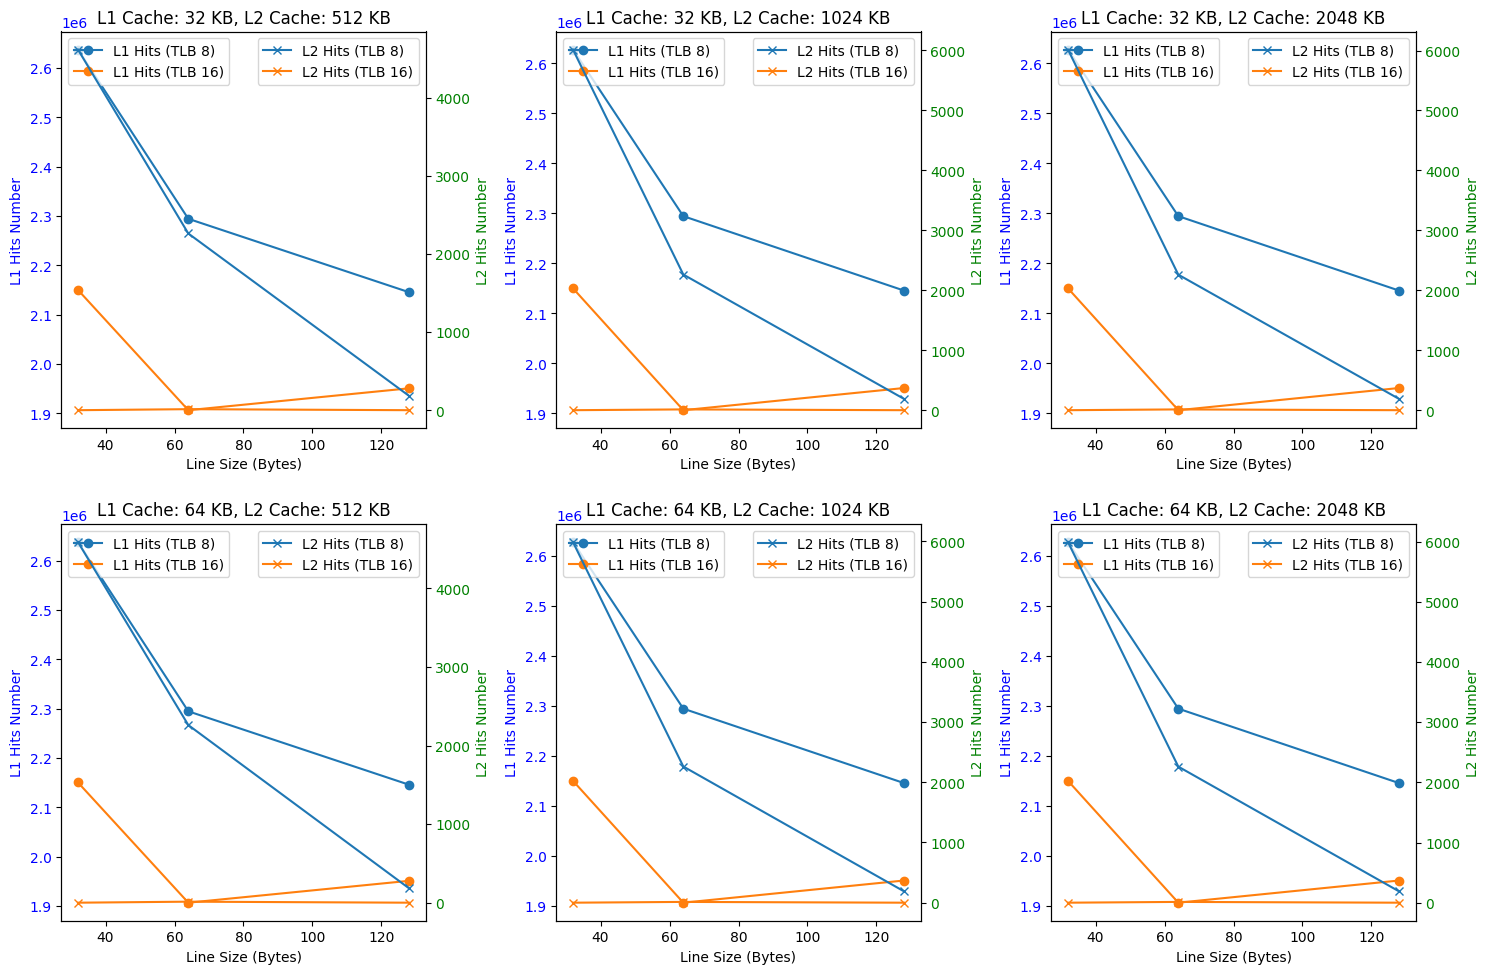

In [48]:
l2_cache_sizes = [512, 1024, 2048]
l1_cache_sizes = [32, 64]
tlb_sizes = [8, 16]

fig, axs = plt.subplots(len(l1_cache_sizes), len(l2_cache_sizes), figsize=(15, 10), squeeze=False)

for i, l1_cache_size in enumerate(l1_cache_sizes):
    for j, l2_cache_size in enumerate(l2_cache_sizes):
        ax = axs[i, j]
        ax2 = ax.twinx()  # Create a twin y-axis for L2 Hits

        for k, tlb_size in enumerate(tlb_sizes):
            # Filter data for specific L1, L2, and TLB sizes
            df_filtered = df[(df['L1 Cache Size'] == l1_cache_size) & 
                             (df['L2 Cache Size'] == l2_cache_size) & 
                             (df['tlb_sizes'] == tlb_size) &(df['L2 asso'] == 'Direct')] 
            # Plotting L1 Hits on the original y-axis
            ax.plot(df_filtered['Line Size'], df_filtered['L1_hits'], 
                    marker='o', linestyle='-', label=f'L1 Hits (TLB {tlb_size})')

            # Plotting L2 Hits on the secondary y-axis
            ax2.plot(df_filtered['Line Size'], df_filtered['L2_hits'], 
                     marker='x', linestyle='-', label=f'L2 Hits (TLB {tlb_size})')

        ax.set_ylabel('L1 Hits Number', color='blue')
        ax2.set_ylabel('L2 Hits Number', color='green')
        ax.set_title(f'L1 Cache: {l1_cache_size} KB, L2 Cache: {l2_cache_size} KB')
        ax.set_xlabel('Line Size (Bytes)')
        ax.tick_params(axis='y', labelcolor='blue')
        ax2.tick_params(axis='y', labelcolor='green')

        ax.legend(loc='upper left')
        ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

 From the figure above, we can see Line size =32 Bytes, TLB = 16 entries,  L2 hits nearly zero.

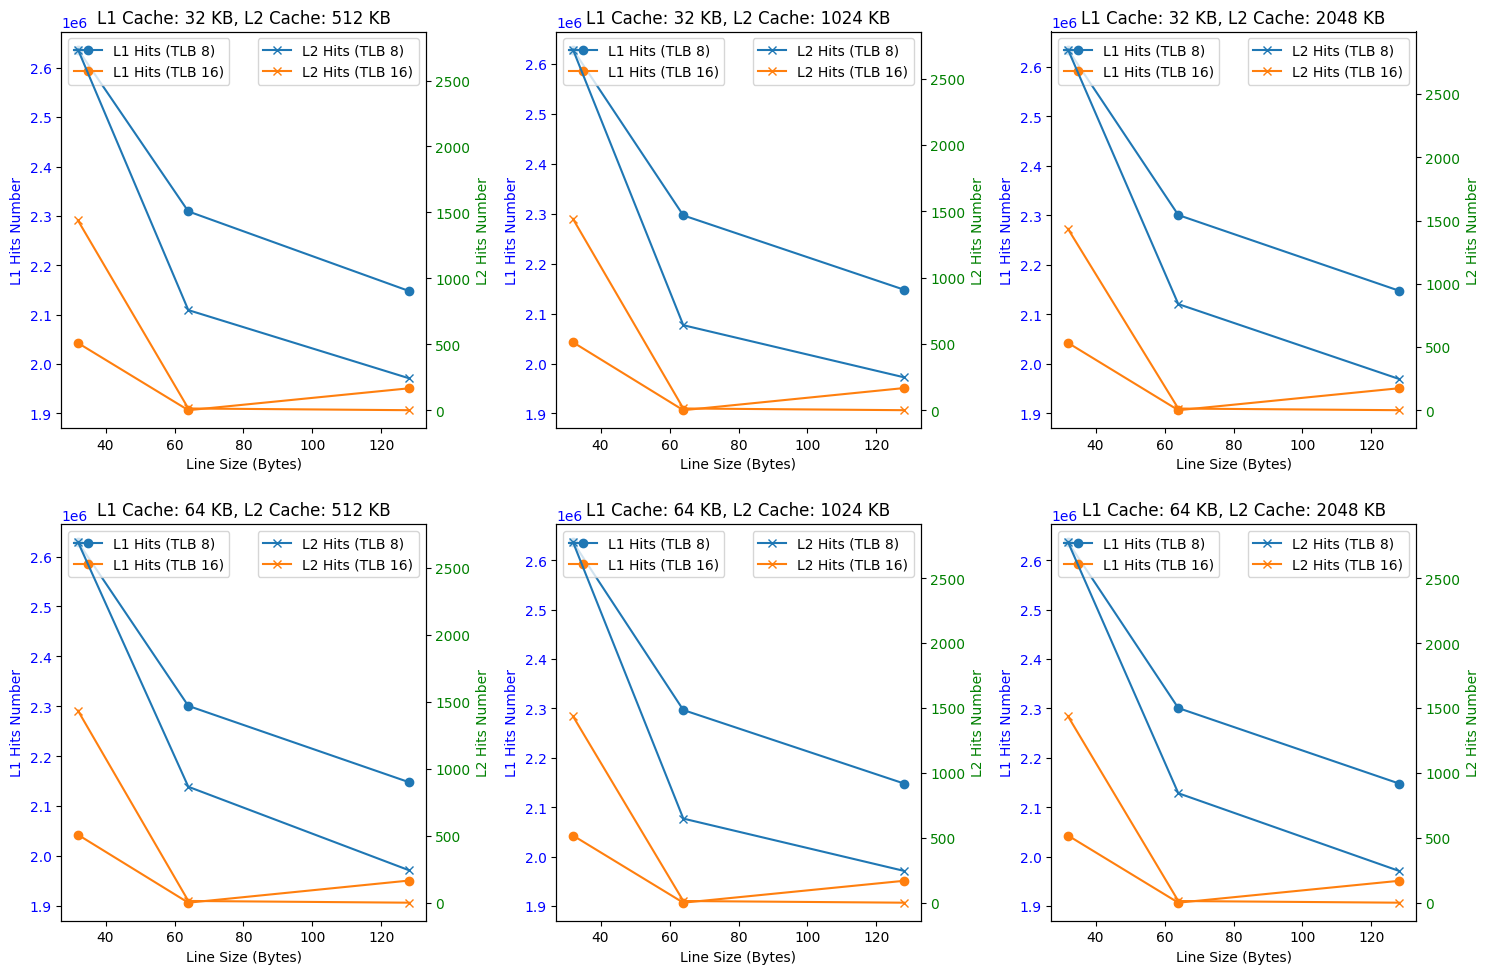

In [49]:
l2_cache_sizes = [512, 1024, 2048]
l1_cache_sizes = [32, 64]
tlb_sizes = [8, 16]

fig, axs = plt.subplots(len(l1_cache_sizes), len(l2_cache_sizes), figsize=(15, 10), squeeze=False)

for i, l1_cache_size in enumerate(l1_cache_sizes):
    for j, l2_cache_size in enumerate(l2_cache_sizes):
        ax = axs[i, j]
        ax2 = ax.twinx()  # Create a twin y-axis for L2 Hits

        for k, tlb_size in enumerate(tlb_sizes):
            # Filter data for specific L1, L2, and TLB sizes
            df_filtered = df[(df['L1 Cache Size'] == l1_cache_size) & 
                             (df['L2 Cache Size'] == l2_cache_size) & 
                             (df['tlb_sizes'] == tlb_size) &(df['L2 asso'] == '2-way')] 
            # Plotting L1 Hits on the original y-axis
            ax.plot(df_filtered['Line Size'], df_filtered['L1_hits'], 
                    marker='o', linestyle='-', label=f'L1 Hits (TLB {tlb_size})')

            # Plotting L2 Hits on the secondary y-axis
            ax2.plot(df_filtered['Line Size'], df_filtered['L2_hits'], 
                     marker='x', linestyle='-', label=f'L2 Hits (TLB {tlb_size})')

        ax.set_ylabel('L1 Hits Number', color='blue')
        ax2.set_ylabel('L2 Hits Number', color='green')
        ax.set_title(f'L1 Cache: {l1_cache_size} KB, L2 Cache: {l2_cache_size} KB')
        ax.set_xlabel('Line Size (Bytes)')
        ax.tick_params(axis='y', labelcolor='blue')
        ax2.tick_params(axis='y', labelcolor='green')

        ax.legend(loc='upper left')
        ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

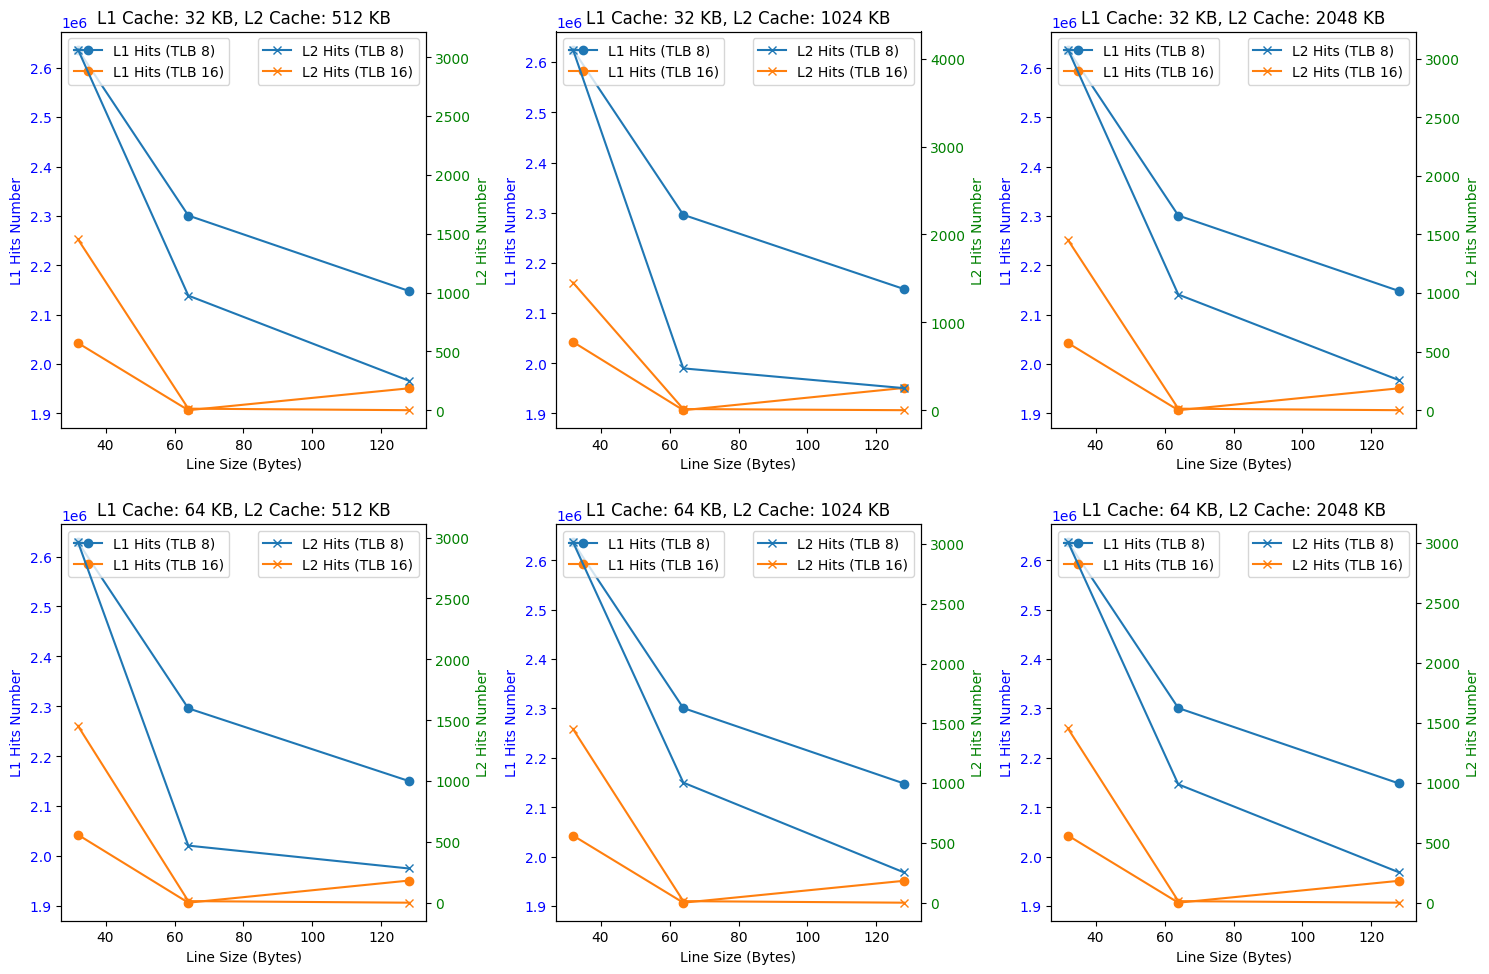

In [50]:
l2_cache_sizes = [512, 1024, 2048]
l1_cache_sizes = [32, 64]
tlb_sizes = [8, 16]

fig, axs = plt.subplots(len(l1_cache_sizes), len(l2_cache_sizes), figsize=(15, 10), squeeze=False)

for i, l1_cache_size in enumerate(l1_cache_sizes):
    for j, l2_cache_size in enumerate(l2_cache_sizes):
        ax = axs[i, j]
        ax2 = ax.twinx()  # Create a twin y-axis for L2 Hits

        for k, tlb_size in enumerate(tlb_sizes):
            # Filter data for specific L1, L2, and TLB sizes
            df_filtered = df[(df['L1 Cache Size'] == l1_cache_size) & 
                             (df['L2 Cache Size'] == l2_cache_size) & 
                             (df['tlb_sizes'] == tlb_size) &(df['L2 asso'] == '4-way')] 
            # Plotting L1 Hits on the original y-axis
            ax.plot(df_filtered['Line Size'], df_filtered['L1_hits'], 
                    marker='o', linestyle='-', label=f'L1 Hits (TLB {tlb_size})')

            # Plotting L2 Hits on the secondary y-axis
            ax2.plot(df_filtered['Line Size'], df_filtered['L2_hits'], 
                     marker='x', linestyle='-', label=f'L2 Hits (TLB {tlb_size})')

        ax.set_ylabel('L1 Hits Number', color='blue')
        ax2.set_ylabel('L2 Hits Number', color='green')
        ax.set_title(f'L1 Cache: {l1_cache_size} KB, L2 Cache: {l2_cache_size} KB')
        ax.set_xlabel('Line Size (Bytes)')
        ax.tick_params(axis='y', labelcolor='blue')
        ax2.tick_params(axis='y', labelcolor='green')

        ax.legend(loc='upper left')
        ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()